In [2]:
import numpy as np
from matplotlib import pyplot as plt

# moment $\mu$ = $NIS$

In [3]:
extent = [8, 12, 2.5, 0]


# current magnitudes (A)
I = np.arange(extent[3],extent[2],.1)
# area magnitudes (m^2)
r = np.arange(extent[0],extent[1],.1)
r = r / 100 / 2
S = np.pi * r**2

# all possible magnetic moments(Am^2)
mu = np.outer(I,S)

# main magnetic field (Tesla)
b0 = 3.045

# torque
t = b0*mu

Max Torque imparted = 0.08127974694779502 Nm


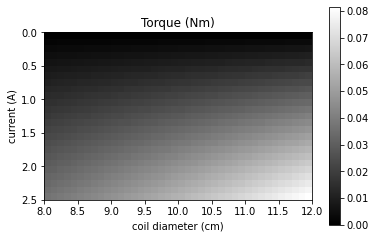

In [4]:
plt.imshow(t, cmap='gray', extent=extent)
plt.title("Torque (Nm)")
plt.ylabel("current (A)")
plt.xlabel("coil diameter (cm)")
plt.colorbar()

print(f"Max Torque imparted = {np.max(t)} Nm")

# Now to Simulate expected fieldmaps from a headcap of 16 coils

In [9]:


!pip install biot-savart
import biot_savart as bs

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# design the coils.
# start with one coil

def gen_save_coils(self, x, y):
    """
        Given position of coil, generate and save the coil geometries for 10 realistic current values
        for 
    """
    # Store the coil x and y
    self.coil_x = x
    self.coil_y = y

    # create the indeces in radians for which to generate the coil. 10 loops so the range is 0 to 10*2*pi. 50*10 = 500 points total.
    pis = np.linspace(0,10*2*pi,500)

    # create a numpy list of x,y,z points of the coil based of the pis indeces. 
    # Make the coil 630um in diameter
    # center the coil around x, y
    # Add 4th dimension to represent current through the segment, set to 1 for now
    coil = np.array([315e-4*cos(pis)+x, 315e-4*sin(pis)+y, np.zeros(500), np.ones(500)]).T

    # create a  of 10 currerangent values from 50uA-700uA
    currents = np.linspace(50e-6,700e-6,10)

    # duplicate the coil 10 times, and multiply the right value of 1 by the respective current value generated above
    coils = [] 
    for current in currents:
        coiltoappend = coil.copy()
        coiltoappend[:,3] *= current
        coils.append(coiltoappend)


    # save the 10 coils in files in a folder called 'coils'. save them as text files with the current value in the name
    for i, coil in enumerate(coils):
        self.coil_paths.append('coils/coil_'+str(i)+'.txt')
        np.savetxt('coils/coil_'+str(i)+'.txt', coil, delimiter=", ")

def setup_coil_for_test(self, coil_num):
    """
        Set the coil used in numpy array format within the Spin Grid object.
    """
    coil = bs.parse_coil(self.coil_paths[coil_num]) 
    chopped = bs.slice_coil(coil, 1)
    self.test_coil = chopped


def compute_off_resonance_from_preset_coil(self, pos=None):
    """
        Set a [num_spins x 1] array of the off resonance frequency of each spin, in Hz.
    """
    if pos is None:
        pos = self.get_all_positions()

    field = bs.calculate_field(self.test_coil, pos[0, :], pos[1, :], pos[2, :])
    self.df = field[:,2] * 4258


def compute_off_resonance_from_coil(self, coil_num, pos=None):
    """
        ** so old code still works...
        Set a [num_spins x 1] array of the off resonance frequency of each spin, in Hz.
        Also set the coil used in numpy array format within the Spin Grid object.
    """

    if pos is None:
        pos = self.get_all_positions()

    coil = bs.parse_coil(self.coil_paths[coil_num]) 
    chopped = bs.slice_coil(coil, 1)
    self.test_coil = coil
    field = bs.calculate_field(chopped, pos[0, :], pos[1, :], pos[2, :])
    self.df = field[:,2] * 4258
    

def compute_off_resonance_from_coil_in_box(self, coil_num, box_width, box_height, box_depth):
    """ 
        x_lim is a list with two elements, x_min and x_max. 
        y_lim is a list with two elements, y_min and y_max. 

        Return a [num_spins_in_box x 1] array of the off resonance frequency of each spin, in Hz.
    """
    # Filter the positions, then use the above function
    pos = self.get_all_positions()
    pos_in_box = pos[:, np.abs(pos[0, :] - self.coil_x) < box_width/2]
    pos_in_box = pos_in_box[:, np.abs(pos_in_box[1, :] - self.coil_y) < box_height/2]
    pos_in_box = pos_in_box[:, np.abs(pos_in_box[2, :]) < box_depth/2]
    
    return self.compute_off_resonance_from_coil(coil_num, pos=pos_in_box)

def plot_coil_field(self, coil_num):
    """
        Plot the field of the coil.
    """
    bs.plot_coil(self.coil_paths[coil_num])

[5 6 7 8 9]
[[ 0  0  0  0  0]
 [ 5  6  7  8  9]
 [10 12 14 16 18]
 [15 18 21 24 27]
 [20 24 28 32 36]]


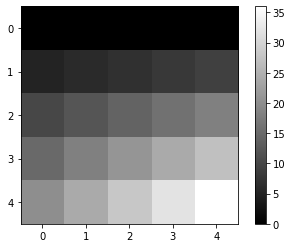

In [5]:
# testing out the functions
x = np.arange(5)
y = np.arange(5,10)
print(y)
print(np.outer(x,y))
plt.imshow(np.outer(x,y), cmap='gray')
plt.colorbar()
